In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np

font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('Poster2Tests.pickle', 'rb')
data = pickle.load(f)
f.close()

In [2]:
print(data['var'])
print()
for key in data['order']:
    print(key)
print()
for key in data['data'][list(data['data'].keys())[0]].keys():
    print(key)

{'localRecluster': [0, 1, 2, 63], 'globalRecluster': [0, 1, 2], 'clusteringOn': ['false', 'true']}

globalRecluster
clusteringOn
localRecluster

# False Positive = Confirmations
CS Joins
Alive valid nodes
Bluetooth
Alone nodes
CS Solos
# True Positive Rejections
Average Battery
BTGlobalRecluster
# False Positive Drift
Max Battery
Samples
Cluster searches
Local Reclusters
# False Positives
Clusters below thresh
BTLocalRecluster
BTClusterSearch
Waits
Detection Time
Lost readings
Number of clusters
# Total False Negatives
# False Positive Wind
Clusters above thresh
# False Negatives
# False Negatives Drift
Recluster period
Avg cluster size
# False Positive Rejections
True Positive Readings
# False Positive Confirmations
BTReadings
Recluster threshold
Min Battery
Percent Alive
# True Positive = Rejections
True Positive Findings
# Total False Positives
Wifi
Global reclusters


In [3]:
inputDict = {'globalRecluster':'GR', 'reclusterThreshold': 'GR Thresh', 'clusteringOn':'Cluster', 'localRecluster':'LR',
             'clusterSearchThresh':'CS', 'CHBatteryDropThresh':'Battery Thresh', 'CHTimeThresh':'Time Thresh'}
paramDict = {'globalRecluster':{'0':'Off', '1':'New', '2':'Old'}, 'clusteringOn':{'true':'On', 'false':'Off'},
             'localRecluster':{'0':'Off', '1':'Minimal', '2':'Standard', '3':'Expansive', '63':'Expansive'}}

In [4]:
i = 0
print(len(data['data'].keys()))

13


In [7]:
def compareOverTime(compare, keyInds, ignoreDict={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for ind in ignoreDict:
            for ignoreKey in ignoreDict[ind]:
                if key[ind] == ignoreKey:
                    ignore = True
        if not ignore:
            run = data['data'][key]
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = run[compare]
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    stats['compare'] = compare
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDict
    return stats

In [8]:
def generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel, strArr, titleArr, topY, xTicks, yTicks):
    legendTitle = ''
    if currentLevel < len(keyInds):
        currentKey = data['order'][keyInds[currentLevel]]
        for var in data['var'][currentKey]:
            if not (currentKey in stats['ignore'] and stats['ignore'][currentKey] == var):
                legendTitle = generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel + 1, strArr + [str(var)], titleArr + [str(currentKey)], topY, xTicks, yTicks)
    else:
        key = '-'.join(strArr)
        if key in stats.keys():
            y = stats[key]
            label = ''
            for i in range(currentLevel-separationLevel):
                if titleArr[i] in inputDict:
                    if titleArr[i] in paramDict:
                        label += inputDict[titleArr[i]] + ': ' + paramDict[titleArr[i]][strArr[i]] + '  '
                    else:
                        label += inputDict[titleArr[i]] + ': ' + strArr[i] + '  '
                else:
                    label += titleArr[i] + ': ' + strArr[i] + '  '
            if 'Cluster: Off  ' in label:
                label = 'Cluster: Off  '
            elif 'Cluster: On  ' in label:
                label = label.replace('Cluster: On  ', '')
            label = label[:len(label)-2]
            #label = '-'.join(strArr[separationLevel:])
            plt.plot(x, y, label=label, linewidth=3)
            #legendTitle = '-'.join(titleArr[separationLevel:])
    if currentLevel == separationLevel:
        title = ''
        if len(titleArr) > 0:
            title = '-'.join(titleArr) + ': '
            title += '-'.join(strArr)
        plt.xlabel('Time (s)')
        plt.ylabel(stats['compare'])
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legendTitle)
        plt.legend(title=legendTitle)
        bottom, top = plt.ylim()
        if topY != 0:
            plt.ylim(bottom, topY)
        if xTicks == []:
            plt.autoscale(axis='x')
        else:
            plt.xticks(xTicks)
        if yTicks == []:
            plt.autoscale(axis='y')
        else:
            plt.yticks(yTicks)
        plt.title(title)
        plt.show()
    return legendTitle

def generateOverTimeGraphs(stats, separationLevel=0, topY=0, xTicks=[], yTicks=[]):
    generateOverTimeGraphsHelper(stats['keyInds'], stats, [i for i in range(stats['minArrLen'])], separationLevel, 0, [], [], topY, xTicks, yTicks)

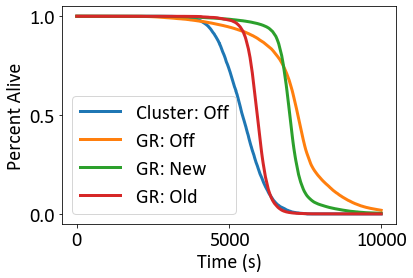

In [77]:
Alive = compareOverTime('Percent Alive', [1,0], {})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

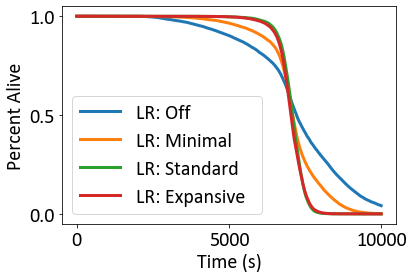

In [65]:
Alive = compareOverTime('Percent Alive', [2], {1:['false'], 0:[2]})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

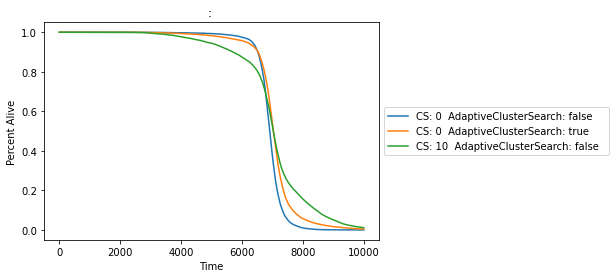

In [50]:
Alive = compareOverTime('Percent Alive', [0,8], {5:[0],7:[],3:['false']})
generateOverTimeGraphs(Alive, 0)

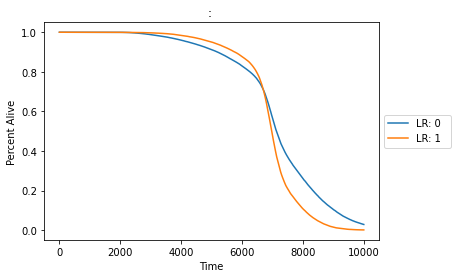

In [40]:
Alive = compareOverTime('Percent Alive', [7], {7:[],3:['false']})
generateOverTimeGraphs(Alive, 0)

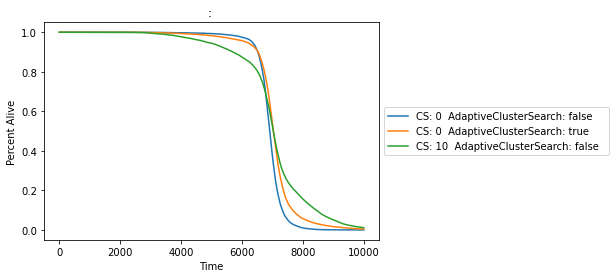

In [19]:
Alive = compareOverTime('Percent Alive', [0,8], {5:[0], 3:['false']})
generateOverTimeGraphs(Alive, 0)

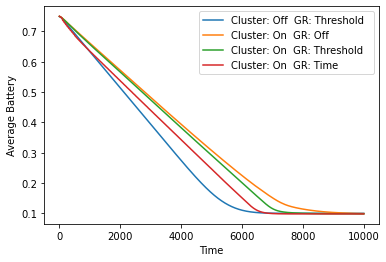

In [33]:
AvgBattery = compareOverTime('Average Battery', [0,2])
generateOverTimeGraphs(AvgBattery, 0)

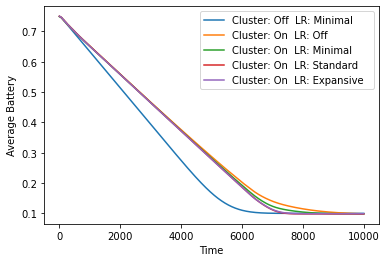

In [34]:
AvgBattery = compareOverTime('Average Battery', [0,3])
generateOverTimeGraphs(AvgBattery, 0)

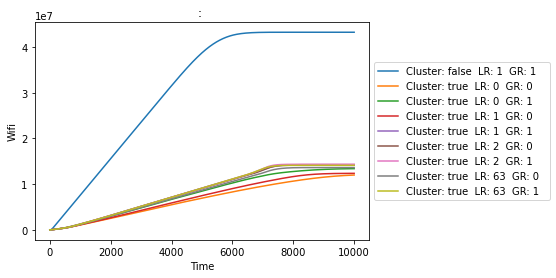

In [14]:
Wifi = compareOverTime('Wifi', [10,2,7])
generateOverTimeGraphs(Wifi, 0)

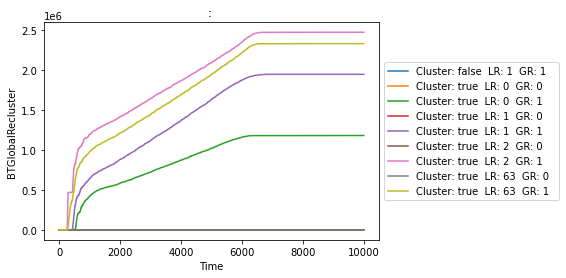

In [17]:
BTGlobalRecluster = compareOverTime('BTGlobalRecluster', [10,2,7])
generateOverTimeGraphs(BTGlobalRecluster, separationLevel=0)

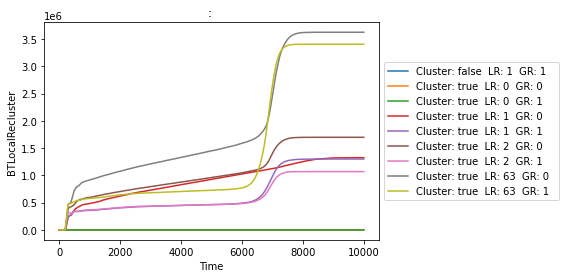

In [18]:
BTLocalRecluster = compareOverTime('BTLocalRecluster', [10,2,7])
generateOverTimeGraphs(BTLocalRecluster, separationLevel=0)

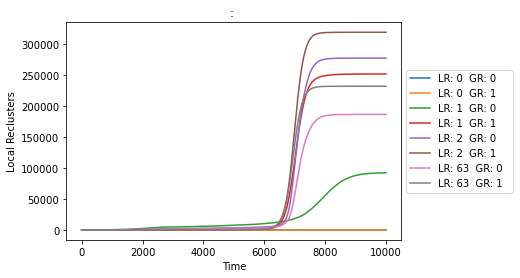

In [20]:
LRs = compareOverTime('Local Reclusters', [2,7], {10:['false']})
generateOverTimeGraphs(LRs, separationLevel=0)

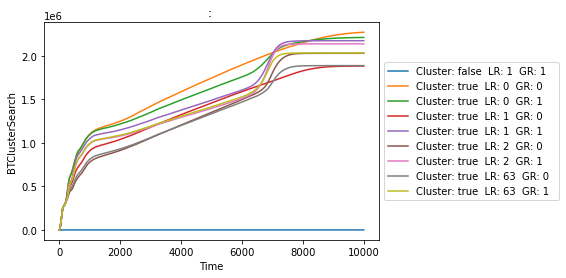

In [21]:
BTClusterSearch = compareOverTime('BTClusterSearch', [10,2,7])
generateOverTimeGraphs(BTClusterSearch, separationLevel=0)

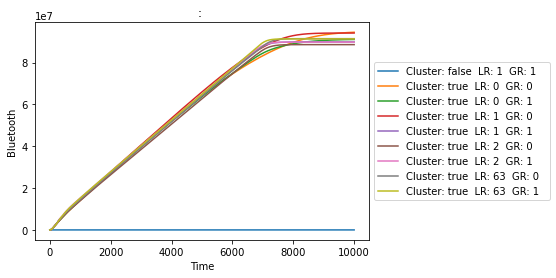

In [22]:
BT = compareOverTime('Bluetooth', [10,2,7])
generateOverTimeGraphs(BT, separationLevel=0)

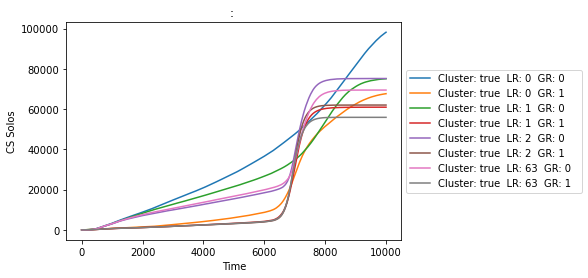

In [23]:
CSSolos = compareOverTime('CS Solos', [10,2,7], {10:['false']})
generateOverTimeGraphs(CSSolos, separationLevel=0)

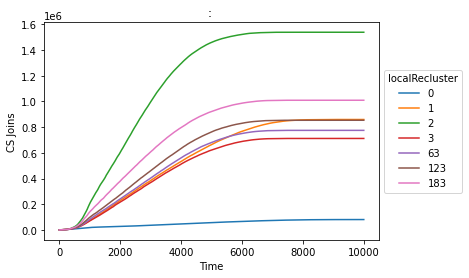

In [24]:
CSJoins = compareOverTime('CS Joins', [3], {2:['false']})
generateOverTimeGraphs(CSJoins, separationLevel=0)

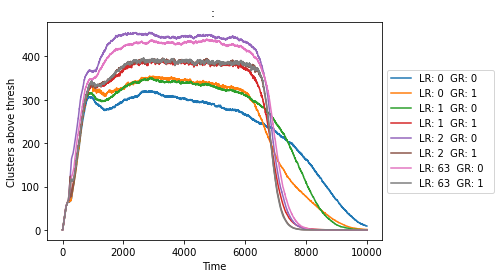

In [27]:
above = compareOverTime('Clusters above thresh', [2,7], {10:['false']})
generateOverTimeGraphs(above, separationLevel=0)

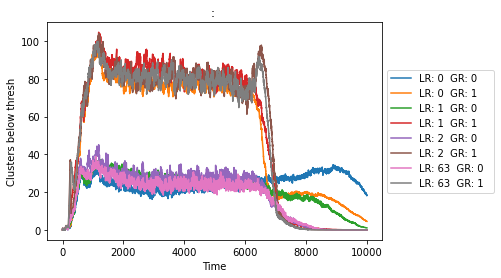

In [28]:
below = compareOverTime('Clusters below thresh', [2,7], {10:['false'], 0:[-1]})
generateOverTimeGraphs(below, separationLevel=0)

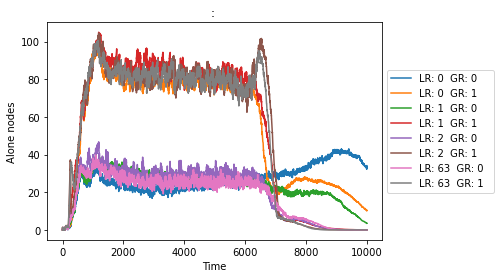

In [29]:
alone = compareOverTime('Alone nodes', [2,7], {10:['false']})
generateOverTimeGraphs(alone, separationLevel=0)

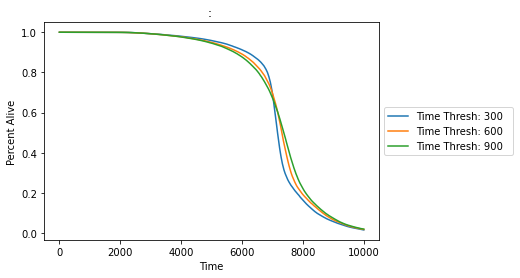

In [48]:
Alive = compareOverTime('Percent Alive', [0], {10:['false'], 7:[1]})
generateOverTimeGraphs(Alive, 0)

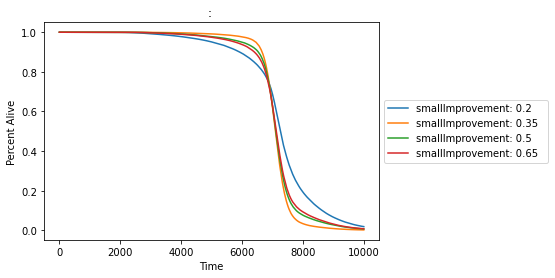

In [47]:
Alive = compareOverTime('Percent Alive', [3], {10:['false']})
generateOverTimeGraphs(Alive, 0)

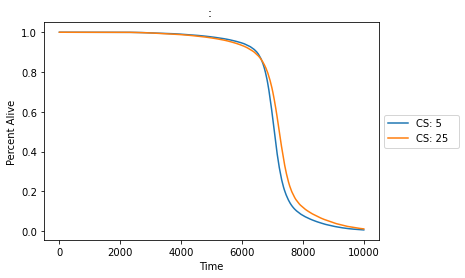

In [49]:
Alive = compareOverTime('Percent Alive', [5], {10:['false']})
generateOverTimeGraphs(Alive, 0)

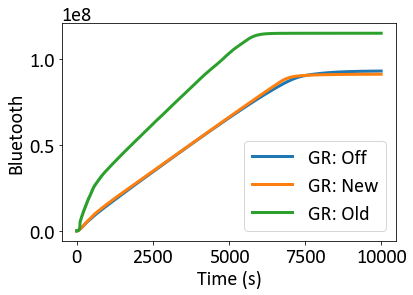

In [9]:
BT = compareOverTime('Bluetooth', [0], {1:['false']})
generateOverTimeGraphs(BT, 0)

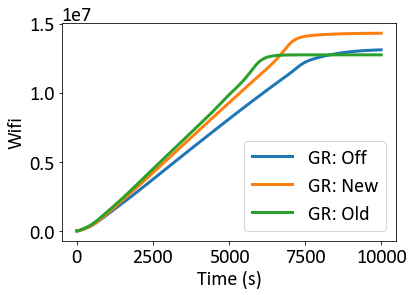

In [10]:
Wifi = compareOverTime('Wifi', [0], {1:['false']})
generateOverTimeGraphs(Wifi, 0)

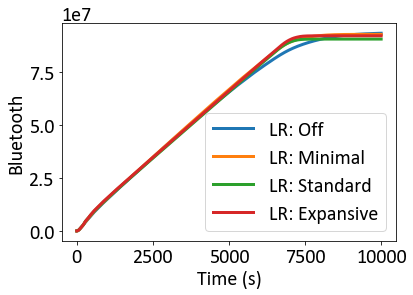

In [11]:
BT = compareOverTime('Bluetooth', [2], {1:['false'], 0:[2]})
generateOverTimeGraphs(BT, 0)

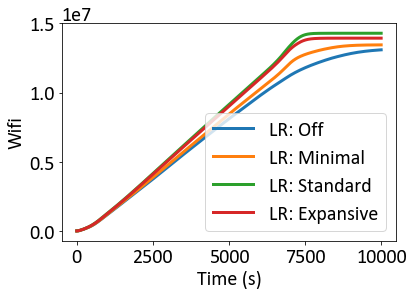

In [12]:
Wifi = compareOverTime('Wifi', [2], {1:['false'], 0:[2]})
generateOverTimeGraphs(Wifi, 0)

In [93]:
def compareOverTimeMultiply(compare, keyInds, ignoreDict={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for ind in ignoreDict:
            for ignoreKey in ignoreDict[ind]:
                if key[ind] == ignoreKey:
                    ignore = True
        if not ignore:
            run = data['data'][key]
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = []
            for dat in compare:
                if len(arr) > 0:
                    for i in range(len(run[dat])):
                        arr[i] *= run[dat][i] 
                else:
                    arr = run[dat][:]
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    compareStr = '  x  '.join(compare)
    stats['compare'] = compareStr
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDict
    return stats

In [100]:
def compareOverTimeAdd(compare, keyInds, ignoreDict={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for ind in ignoreDict:
            for ignoreKey in ignoreDict[ind]:
                if key[ind] == ignoreKey:
                    ignore = True
        if not ignore:
            run = data['data'][key]
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = []
            for dat in compare:
                if len(arr) > 0:
                    for i in range(len(run[dat])):
                        arr[i] += run[dat][i]/len(compare)
                else:
                    for i in range(len(run[dat])):
                        arr += [run[dat][i]/len(compare)]
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    compareStr = '  +  '.join(compare)
    stats['compare'] = compareStr
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDict
    return stats

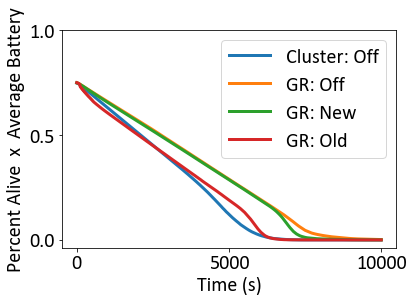

In [98]:
Alive = compareOverTimeMultiply(['Percent Alive', 'Average Battery'], [1,0], {})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

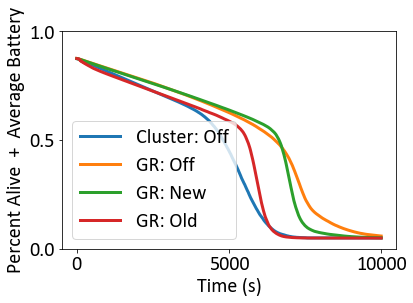

In [101]:
Alive = compareOverTimeAdd(['Percent Alive', 'Average Battery'], [1,0], {})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

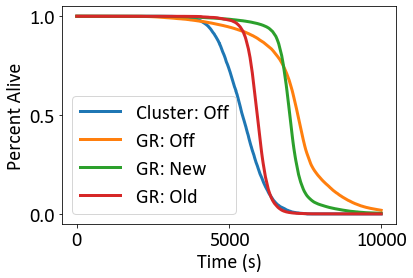

In [88]:
Alive = compareOverTime('Percent Alive', [1,0], {})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

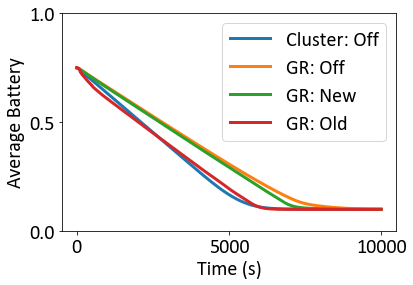

In [90]:
Alive = compareOverTime('Average Battery', [1,0], {})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

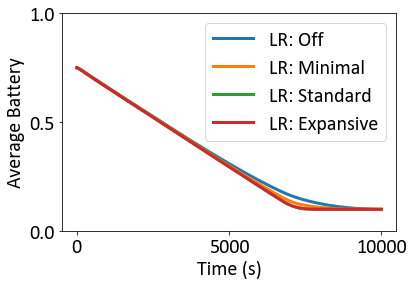

In [102]:
Alive = compareOverTime('Average Battery', [1,2], {1:['false'], 0:[2]})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

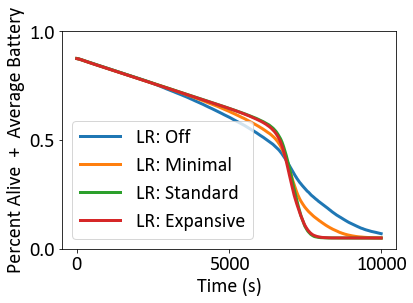

In [103]:
Alive = compareOverTimeAdd(['Percent Alive', 'Average Battery'], [1,2], {1:['false'], 0:[2]})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])